## VCF plots
Multiple vcfs were combined into a single vcf in bash prior to this analysis.

In [1]:
# import scikit-allel
import allel
# check which version is installed
print(allel.__version__)

1.3.2


In [2]:
# read in the vcf
callset = allel.read_vcf('gatkVcfs/comb.vcf')

In [3]:
## keys to subset vcf features
sorted(callset.keys())

['samples',
 'variants/ALT',
 'variants/CHROM',
 'variants/FILTER_PASS',
 'variants/ID',
 'variants/POS',
 'variants/QUAL',
 'variants/REF']

In [4]:
# QUALs from the combined vcf
callset['variants/QUAL']

array([1159.06, 1958.06,  971.06, ..., 1465.06,  840.03, 1511.06],
      dtype=float32)

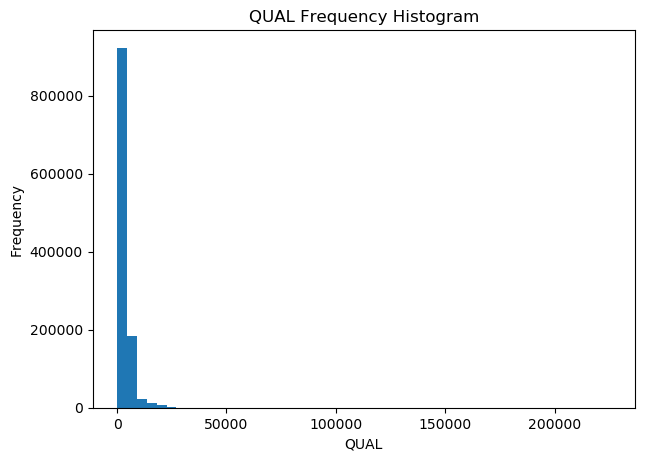

In [5]:
# plot distribution of Qaulity
x=callset['variants/QUAL']
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(x, bins=50)
plt.gca().set(title='QUAL Frequency Histogram', xlabel='QUAL', ylabel='Frequency');

In [6]:
## obtain maximum qual and minimum qual
print('Maximum quality is %i' % max(callset['variants/QUAL']))
print('Minimum quality is %i' % min(callset['variants/QUAL']))

Maximum quality is 225517
Minimum quality is 30


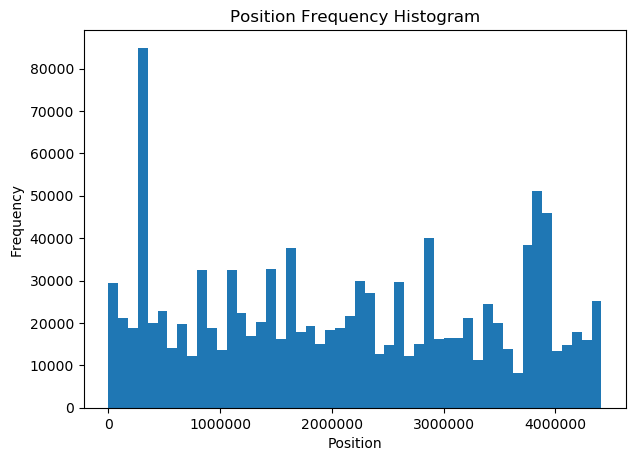

In [7]:
## plot frequency of positions with snps
### this may be informative about which regions are highly mutable
y=callset['variants/POS']
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram 
plt.hist(y, bins=50)
plt.gca().set(title='Position Frequency Histogram', xlabel='Position', ylabel='Frequency');

In [13]:
## obtain data corresponding to depth
callset = allel.read_vcf('gatkVcfs/comb.vcf', fields=['DP'])

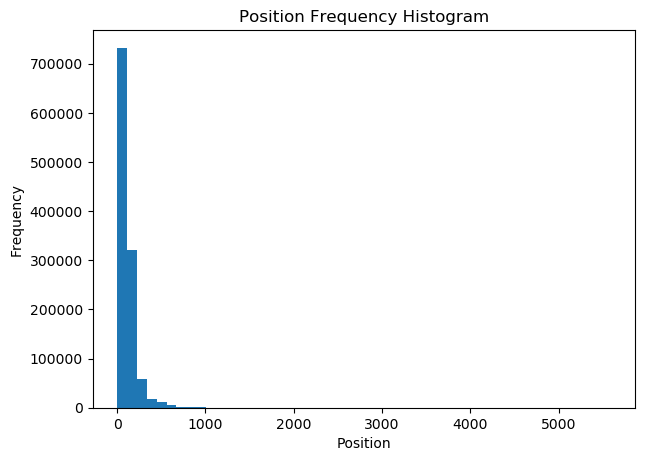

In [14]:
## plot depth distributin
z=callset['variants/DP']
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram
plt.hist(z, bins=50)
plt.gca().set(title='Position Frequency Histogram', xlabel='Position', ylabel='Frequency');

From the plots it's noteworthy that the quality and depth of the SNPs are skewed to the right.
It is also noteworthy that at around position 500,000, there are multiple SNPs occuring than in other positions. This could have a biological implication or cause.